## Prepare Data 

In [1]:
#import libraries
import pandas as pd
import igraph as ig
import numpy as np

In [2]:
df = pd.read_csv('tweet_retweet_network.csv')
df

,tweet_id,user_id_retweet_df,user_id_tweet_df,news_id,is_fake_news
0,1033706162695356417,7.873112e+08,4.335085e+07,politifact99,0.0
1,1033706162695356417,7.873112e+08,4.335085e+07,politifact340,0.0
2,1035580865160638464,3.338247e+09,1.629771e+07,politifact99,0.0
3,1035580865160638464,3.338247e+09,1.629771e+07,politifact340,0.0
4,934206237708865537,7.543102e+17,5.820642e+06,politifact99,0.0
...,...,...,...,...,...
573632,813192381583466496,NaN,3.001448e+09,politifact13600,1.0
573633,812814063763918848,NaN,5.256945e+08,politifact13600,1.0
573634,918510122363744257,NaN,1.525687e+09,politifact14621,1.0
573635,917522953390223366,NaN,7.889922e+17,politifact14621,1.0


In [3]:
df_fake = df[df['is_fake_news'] == 1.0]
df_real = df[df['is_fake_news'] == 0.0]

In [4]:
df_net_all = df[['user_id_retweet_df', 'user_id_tweet_df']].dropna()
df_net_fake = df_fake[['user_id_retweet_df', 'user_id_tweet_df']].dropna()
df_net_real = df_real[['user_id_retweet_df', 'user_id_tweet_df']].dropna()

In [5]:
df_net_all

,user_id_retweet_df,user_id_tweet_df
0,7.873112e+08,4.335085e+07
1,7.873112e+08,4.335085e+07
2,3.338247e+09,1.629771e+07
3,3.338247e+09,1.629771e+07
4,7.543102e+17,5.820642e+06
...,...,...
89022,1.496571e+09,7.960258e+17
89023,9.816488e+08,7.848257e+17
89024,7.200451e+08,2.435832e+07
89025,8.990504e+08,1.342402e+08


In [6]:
df_net_fake

,user_id_retweet_df,user_id_tweet_df
4125,8.856920e+17,3.974499e+07
4161,1.917218e+09,8.277065e+07
4235,2.559283e+08,2.147477e+07
4329,8.222716e+17,8.247972e+17
4379,1.759702e+07,1.109180e+08
...,...,...
89022,1.496571e+09,7.960258e+17
89023,9.816488e+08,7.848257e+17
89024,7.200451e+08,2.435832e+07
89025,8.990504e+08,1.342402e+08


In [7]:
df_net_real

,user_id_retweet_df,user_id_tweet_df
0,7.873112e+08,43350851.0
1,7.873112e+08,43350851.0
2,3.338247e+09,16297707.0
3,3.338247e+09,16297707.0
4,7.543102e+17,5820642.0
...,...,...
68198,2.163463e+07,860585294.0
68199,3.227421e+07,48608766.0
68200,8.013800e+05,18251414.0
68201,2.404211e+08,18251414.0


### Graph Creation and metrics

In [8]:
g_all = ig.Graph.TupleList(df_net_all.itertuples(index=False), directed=True)

In [9]:
g_real = ig.Graph.TupleList(df_net_real.itertuples(index=False), directed=True)

In [10]:
g_fake = ig.Graph.TupleList(df_net_fake.itertuples(index=False), directed=True)

In [11]:
print('diameter for all news retweet network: ',g_all.diameter())
print('diameter for real news retweet network: ',g_real.diameter())
print('diameter for fake news retweet network: ',g_fake.diameter())

diameter for all news retweet network:  9
diameter for real news retweet network:  9
diameter for fake news retweet network:  5


In [12]:
print('clustering coefficient for all news retweet network: ',g_all.transitivity_undirected())
print('clustering coefficient for real news retweet network: ',g_real.transitivity_undirected())
print('clustering coeffiencent for fake news retweet network: ',g_fake.transitivity_undirected())

clustering coefficient for all news retweet network:  0.0005758266101118929
clustering coefficient for real news retweet network:  0.0005978739601975375
clustering coeffiencent for fake news retweet network:  0.000514478906364839


In [13]:
print('average degree for all news retweet network: ',np.mean(g_all.degree()))
print('average degree for real news retweet network: ', np.mean(g_real.degree()))
print('average degree for fake news retweet network: ',np.mean(g_fake.degree()))

average degree for all news retweet network:  1.4620799081748055
average degree for real news retweet network:  1.4227065873417177
average degree for fake news retweet network:  1.3010251039385572


In [14]:
df_all_degree = pd.DataFrame({'name': list(g_all.vs['name']), 'degree':g_all.degree() } )
df_all_degree = df_all_degree.sort_values('degree', ascending = False).reset_index(drop = True)
df_all_degree.head(10)

,name,degree
0,8.714661e+17,1177
1,1.711288e+07,400
2,1.367531e+06,350
3,2.973759e+09,331
4,2.597754e+09,241
5,9.000407e+17,238
6,2.878549e+07,210
7,5.403905e+07,177
8,3.997553e+07,161
9,1.911303e+09,156


In [15]:
df_fake_degree = pd.DataFrame({'name': list(g_fake.vs['name']), 'degree':g_fake.degree() } )
df_fake_degree = df_fake_degree.sort_values('degree', ascending = False).reset_index(drop = True)
df_fake_degree.head(10)

,name,degree
0,1.911303e+09,153
1,2.103257e+07,119
2,2.246538e+08,83
3,2.417844e+09,56
4,1.429485e+07,50
5,2.767681e+09,44
6,1.355218e+09,42
7,8.953122e+06,38
8,2.309297e+09,37
9,5.257272e+07,33


## Leading Eigenvector Community Detection

In [16]:
comm_leading_eigenvector= g_fake.community_leading_eigenvector()

/Users/susankoruthu/opt/anaconda3/lib/python3.8/site-packages/igraph/__init__.py:1281: RuntimeWarning: This method was developed for undirected graphs at src/community/leading_eigenvector.c:530
  membership, _, q = GraphBase.community_leading_eigenvector(


In [17]:
df_leading_eigenvector = pd.DataFrame({'name': list(g_fake.vs['name']), 'community':comm_leading_eigenvector.membership } )
df_leading_eigenvector

,name,community
0,8.856920e+17,0
1,3.974499e+07,0
2,1.917218e+09,1
3,8.277065e+07,1
4,2.559283e+08,2
...,...,...
31504,3.995662e+09,1339
31505,6.957517e+17,11622
31506,9.816488e+08,8781
31507,7.200451e+08,10428


In [18]:
df_leading_eigenvector['community'].value_counts()

11642    386
11622    287
214      203
11627    198
11641    163
        ... 
4476       2
4477       2
4478       2
4479       2
11614      2
Name: community, Length: 11647, dtype: int64

In [19]:
comm_leading_eigenvector.subgraphs()[11642].diameter()

3

In [20]:
modularity = g_fake.modularity(comm_leading_eigenvector)
print(modularity)

0.9946281435098392


In [21]:
df_leading_eigenvector.describe()

,name,community
count,3.150900e+04,31509.000000
mean,2.187160e+17,5893.927989
std,3.747241e+17,3769.656414
min,7.670000e+02,0.000000
25%,1.801512e+08,2414.000000
50%,1.220386e+09,5757.000000
75%,7.065833e+17,9258.000000
max,1.074002e+18,11646.000000


In [22]:
pd.DataFrame(df_leading_eigenvector['community'].value_counts()).quantile(0.999)

community    107.062
Name: 0.999, dtype: float64

## Prepare Data for Graphframes and Robustness Disruption

In [23]:
df_le_com1 = df_leading_eigenvector[df_leading_eigenvector['community']==11642]
df_le_com1 

,name,community
638,1.440617e+09,11642
639,3.317085e+07,11642
678,3.453434e+08,11642
679,3.760202e+08,11642
990,3.817328e+09,11642
...,...,...
31283,3.381218e+09,11642
31287,3.805432e+08,11642
31296,3.845993e+08,11642
31337,2.159220e+09,11642


In [24]:
le_com1_list = df_le_com1['name'].tolist()

In [25]:
df_fake_com1 = df_net_fake[df_net_fake['user_id_retweet_df'].isin(le_com1_list)]
df_fake_com1 = df_fake_com1[df_fake_com1['user_id_tweet_df'].isin(le_com1_list)]
df_fake_com1

,user_id_retweet_df,user_id_tweet_df
68209,1.440617e+09,3.317085e+07
68230,3.453434e+08,3.760202e+08
68402,3.817328e+09,1.341686e+09
68496,5.028776e+07,7.631806e+17
68551,2.287367e+09,5.329788e+07
...,...,...
88825,3.845993e+08,1.584306e+07
88869,2.159220e+09,9.389488e+08
88925,1.921811e+07,5.831230e+08
88926,4.898620e+07,9.617064e+08


In [26]:
com1_node_list = list(set(df_fake_com1['user_id_retweet_df'].tolist() + df_fake_com1['user_id_tweet_df'].tolist()))

com1_nodes_df = pd.DataFrame({'id':com1_node_list, 'node':com1_node_list})
com1_nodes_df

,id,node
0,9.388038e+17,9.388038e+17
1,9.337378e+17,9.337378e+17
2,7.197561e+17,7.197561e+17
3,7.872964e+17,7.872964e+17
4,8.232031e+17,8.232031e+17
...,...,...
381,1.711509e+07,1.711509e+07
382,2.755170e+07,2.755170e+07
383,1.322291e+08,1.322291e+08
384,5.553970e+07,5.553970e+07


In [27]:
df_fake_com1 = df_fake_com1.rename(columns = {'user_id_retweet_df':'dst', 'user_id_tweet_df':'src'})
df_fake_com1 = df_fake_com1[['src','dst']]
df_fake_com1

,src,dst
68209,3.317085e+07,1.440617e+09
68230,3.760202e+08,3.453434e+08
68402,1.341686e+09,3.817328e+09
68496,7.631806e+17,5.028776e+07
68551,5.329788e+07,2.287367e+09
...,...,...
88825,1.584306e+07,3.845993e+08
88869,9.389488e+08,2.159220e+09
88925,5.831230e+08,1.921811e+07
88926,9.617064e+08,4.898620e+07


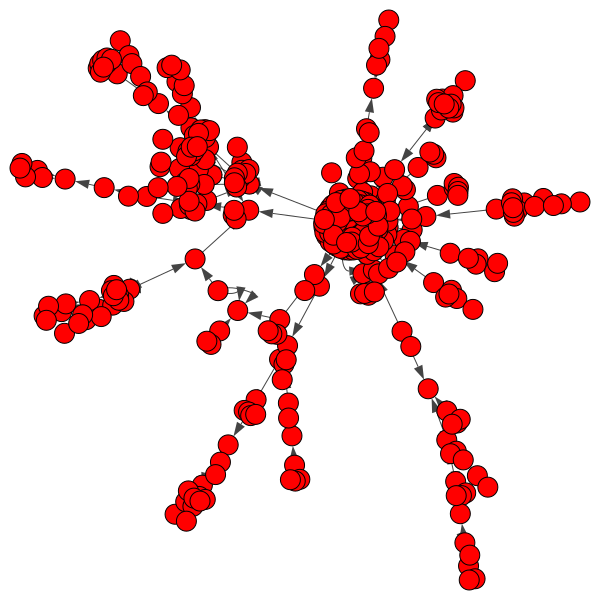

In [28]:
g_com1 = ig.Graph.TupleList(df_fake_com1.itertuples(index=False), directed=True)

ig.plot(g_com1)

In [29]:
tweet_retweet_metrics = pd.read_csv('tweet_retweet_counts.csv')
tweet_retweet_metrics

,user_id,tweet_real_news_count,tweet_fake_news_count,tweet_count,retweet_real_news_count,retweet_fake_news_count,retweet_count,tweet_retweet_fake_count,tweet_retweet_real_count,tweet_retweet_count,percentage_fake
0,1000011520099737600,1,0,1,0,0,0,0,1,1,0.0
1,1000015310651645953,1,0,1,0,0,0,0,1,1,0.0
2,1000016148920913920,1,0,1,0,0,0,0,1,1,0.0
3,1000017210381819904,1,0,1,0,0,0,0,1,1,0.0
4,100002112,2,0,2,0,0,0,0,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
364759,999970415748435969,4,0,4,0,0,0,0,4,4,0.0
364760,999973035540209664,8,0,8,0,0,0,0,8,8,0.0
364761,999973630195961856,1,0,1,0,0,0,0,1,1,0.0
364762,999975256981942273,0,1,1,0,0,0,1,0,1,1.0


In [30]:
com1_metrics = pd.merge(com1_nodes_df,tweet_retweet_metrics[['user_id','percentage_fake','tweet_retweet_fake_count']], left_on = 'node', right_on = 'user_id', how = 'left')
com1_metrics = com1_metrics.sort_values(['percentage_fake', 'tweet_retweet_fake_count'], ascending = False).drop(['user_id', 'percentage_fake','tweet_retweet_fake_count'], axis = 1).reset_index(drop=True)
com1_metrics

,id,node
0,7.148876e+17,7.148876e+17
1,2.154595e+08,2.154595e+08
2,1.035115e+09,1.035115e+09
3,2.326604e+09,2.326604e+09
4,2.999356e+07,2.999356e+07
...,...,...
381,8.715474e+17,8.715474e+17
382,7.710956e+17,7.710956e+17
383,7.317664e+17,7.317664e+17
384,9.197635e+17,9.197635e+17


In [31]:
com1_nodes = com1_metrics
#com1_nodes.to_csv('le_com1_nodes.csv', index = False)
#df_fake_com1.to_csv('le_com1_edges.csv', index = False)

### Community 2

In [32]:
df_le_com2 = df_leading_eigenvector[df_leading_eigenvector['community']==11622]
df_le_com2 

,name,community
648,7.551275e+17,11622
649,2.371403e+08,11622
731,1.935895e+08,11622
732,2.611067e+09,11622
885,3.400552e+09,11622
...,...,...
31194,4.768710e+07,11622
31257,2.784632e+09,11622
31319,3.311945e+09,11622
31383,1.371917e+08,11622


In [33]:
le_com2_list = df_le_com2['name'].tolist()

In [34]:
df_fake_com2 = df_net_fake[df_net_fake['user_id_retweet_df'].isin(le_com2_list)]
df_fake_com2 = df_fake_com2[df_fake_com2['user_id_tweet_df'].isin(le_com2_list)]
df_fake_com2

,user_id_retweet_df,user_id_tweet_df
68215,7.551275e+17,2.371403e+08
68257,1.935895e+08,2.611067e+09
68338,3.400552e+09,1.578096e+09
68403,4.668486e+07,1.364870e+09
68410,3.740733e+09,2.197834e+09
...,...,...
88735,8.531855e+08,4.768710e+07
88794,2.784632e+09,2.611067e+09
88852,3.311945e+09,1.265464e+09
88902,1.371917e+08,1.330052e+08


In [35]:
com2_node_list = list(set(df_fake_com2['user_id_retweet_df'].tolist() + df_fake_com2['user_id_tweet_df'].tolist()))

com2_nodes_df = pd.DataFrame({'id':com2_node_list, 'node':com2_node_list})
com2_nodes_df

,id,node
0,7.551275e+17,7.551275e+17
1,7.461340e+17,7.461340e+17
2,7.980380e+17,7.980380e+17
3,7.972981e+17,7.972981e+17
4,8.990013e+17,8.990013e+17
...,...,...
282,1.147704e+08,1.147704e+08
283,1.689912e+09,1.689912e+09
284,2.430505e+08,2.430505e+08
285,5.209651e+07,5.209651e+07


In [36]:
df_fake_com2 = df_fake_com2.rename(columns = {'user_id_retweet_df':'dst', 'user_id_tweet_df':'src'})
df_fake_com2 = df_fake_com2[['src','dst']]
df_fake_com2

,src,dst
68215,2.371403e+08,7.551275e+17
68257,2.611067e+09,1.935895e+08
68338,1.578096e+09,3.400552e+09
68403,1.364870e+09,4.668486e+07
68410,2.197834e+09,3.740733e+09
...,...,...
88735,4.768710e+07,8.531855e+08
88794,2.611067e+09,2.784632e+09
88852,1.265464e+09,3.311945e+09
88902,1.330052e+08,1.371917e+08


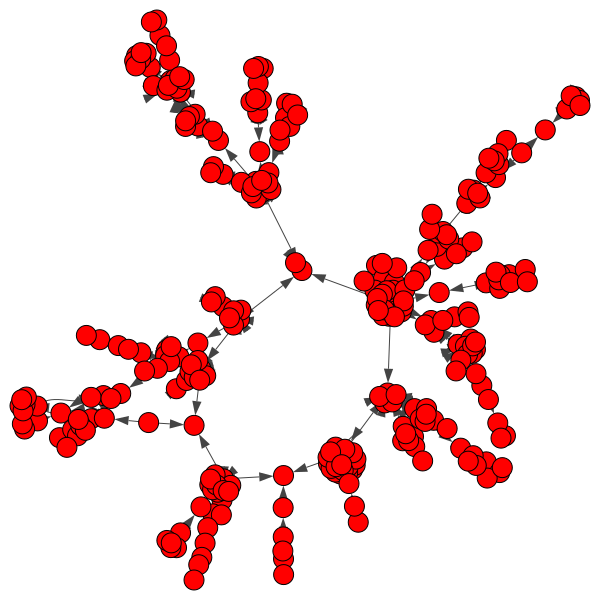

In [37]:
g_com2 = ig.Graph.TupleList(df_fake_com2.itertuples(index=False), directed=True)

ig.plot(g_com2)

In [38]:
#com2_nodes_df.to_csv('le_com2_nodes.csv', index = False)
#df_fake_com2.to_csv('le_com2_edges.csv', index = False)

## Community 3

In [39]:
df_le_com3 = df_leading_eigenvector[df_leading_eigenvector['community']==214]
df_le_com3 

,name,community
466,1.426710e+09,214
467,1.411902e+09,214
851,6.400884e+07,214
852,6.265030e+08,214
1458,1.605804e+09,214
...,...,...
31011,3.313742e+09,214
31013,2.303501e+07,214
31071,8.931119e+17,214
31082,5.685204e+08,214


In [40]:
le_com3_list = df_le_com3['name'].tolist()

In [41]:
df_fake_com3 = df_net_fake[df_net_fake['user_id_retweet_df'].isin(le_com3_list)]
df_fake_com3 = df_fake_com3[df_fake_com3['user_id_tweet_df'].isin(le_com3_list)]
df_fake_com3

,user_id_retweet_df,user_id_tweet_df
49655,1.426710e+09,1.411902e+09
68321,6.400884e+07,6.265030e+08
68663,1.605804e+09,3.886379e+07
68789,5.880898e+07,1.986011e+07
68901,2.498183e+07,2.922631e+08
...,...,...
88750,2.336081e+07,1.106813e+08
88761,5.538136e+07,4.592016e+07
88848,1.053184e+09,5.797912e+08
88919,2.589525e+07,2.002245e+07


In [42]:
com3_node_list = list(set(df_fake_com3['user_id_retweet_df'].tolist() + df_fake_com3['user_id_tweet_df'].tolist()))

com3_nodes_df = pd.DataFrame({'id':com3_node_list, 'node':com3_node_list})
com3_nodes_df

,id,node
0,7.631303e+17,7.631303e+17
1,1.057778e+18,1.057778e+18
2,9.660159e+17,9.660159e+17
3,9.972780e+17,9.972780e+17
4,9.308387e+17,9.308387e+17
...,...,...
198,2.623114e+08,2.623114e+08
199,1.498574e+09,1.498574e+09
200,5.451284e+08,5.451284e+08
201,3.003809e+09,3.003809e+09


In [43]:
df_fake_com3 = df_fake_com3.rename(columns = {'user_id_retweet_df':'dst', 'user_id_tweet_df':'src'})
df_fake_com3 = df_fake_com3[['src','dst']]
df_fake_com3

,src,dst
49655,1.411902e+09,1.426710e+09
68321,6.265030e+08,6.400884e+07
68663,3.886379e+07,1.605804e+09
68789,1.986011e+07,5.880898e+07
68901,2.922631e+08,2.498183e+07
...,...,...
88750,1.106813e+08,2.336081e+07
88761,4.592016e+07,5.538136e+07
88848,5.797912e+08,1.053184e+09
88919,2.002245e+07,2.589525e+07


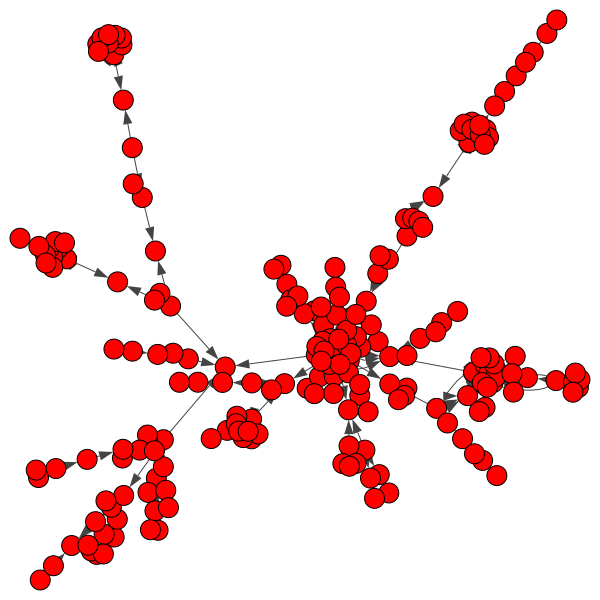

In [44]:
g_com3 = ig.Graph.TupleList(df_fake_com3.itertuples(index=False), directed=True)
ig.plot(g_com3)

In [45]:
#com3_nodes_df.to_csv('le_com3_nodes.csv', index = False)
#df_fake_com3.to_csv('le_com3_edges.csv', index = False)

### Community 4

In [46]:
df_le_com4 = df_leading_eigenvector[df_leading_eigenvector['community']==11627]
df_le_com4 

,name,community
984,5.066415e+08,11627
985,1.904357e+07,11627
1011,9.015851e+17,11627
1012,3.401255e+09,11627
1211,4.079558e+08,11627
...,...,...
30944,2.815371e+08,11627
31079,8.737537e+17,11627
31440,1.792504e+08,11627
31452,3.483230e+08,11627


In [47]:
le_com4_list = df_le_com4['name'].tolist()

In [48]:
df_fake_com4 = df_net_fake[df_net_fake['user_id_retweet_df'].isin(le_com4_list)]
df_fake_com4 = df_fake_com4[df_fake_com4['user_id_tweet_df'].isin(le_com4_list)]
df_fake_com4

,user_id_retweet_df,user_id_tweet_df
68399,5.066415e+08,1.904357e+07
68413,9.015851e+17,3.401255e+09
68518,1.904357e+07,4.079558e+08
68570,3.286796e+09,6.343304e+08
68604,3.286796e+09,1.251284e+08
...,...,...
88889,1.655766e+09,9.841634e+07
88908,9.841634e+07,1.655766e+09
88966,3.483230e+08,8.066953e+17
88975,1.792504e+08,3.481966e+09


In [49]:
com4_node_list = list(set(df_fake_com4['user_id_retweet_df'].tolist() + df_fake_com4['user_id_tweet_df'].tolist()))

com4_nodes_df = pd.DataFrame({'id':com4_node_list, 'node':com4_node_list})
com4_nodes_df

,id,node
0,9.015851e+17,9.015851e+17
1,7.154743e+17,7.154743e+17
2,7.541154e+17,7.541154e+17
3,7.767937e+17,7.767937e+17
4,8.379208e+17,8.379208e+17
...,...,...
193,7.550310e+08,7.550310e+08
194,8.193971e+17,8.193971e+17
195,5.270098e+08,5.270098e+08
196,5.401528e+08,5.401528e+08


In [50]:
df_fake_com4 = df_fake_com4.rename(columns = {'user_id_retweet_df':'dst', 'user_id_tweet_df':'src'})
df_fake_com4 = df_fake_com4[['src','dst']]
df_fake_com4

,src,dst
68399,1.904357e+07,5.066415e+08
68413,3.401255e+09,9.015851e+17
68518,4.079558e+08,1.904357e+07
68570,6.343304e+08,3.286796e+09
68604,1.251284e+08,3.286796e+09
...,...,...
88889,9.841634e+07,1.655766e+09
88908,1.655766e+09,9.841634e+07
88966,8.066953e+17,3.483230e+08
88975,3.481966e+09,1.792504e+08


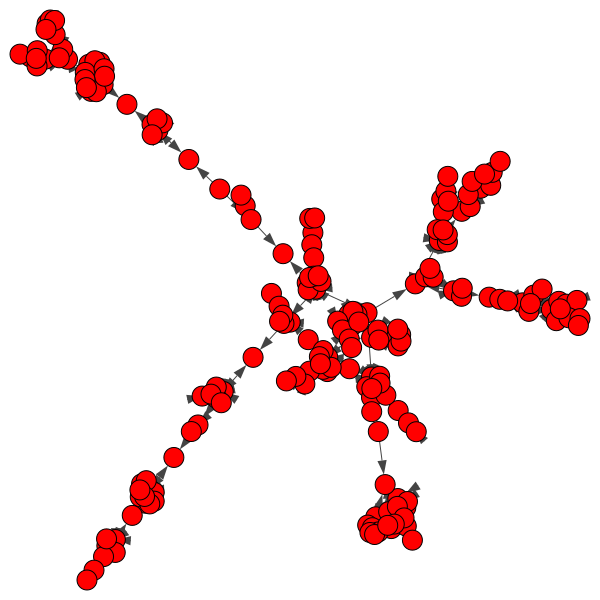

In [51]:
g_com4 = ig.Graph.TupleList(df_fake_com4.itertuples(index=False), directed=True)
ig.plot(g_com4)

In [52]:
#com4_nodes_df.to_csv('le_com4_nodes.csv', index = False)
#df_fake_com4.to_csv('le_com4_edges.csv', index = False)

### Community 5

In [53]:
df_le_com5 = df_leading_eigenvector[df_leading_eigenvector['community']==11641]
df_le_com5 

,name,community
1377,3.020456e+09,11641
1378,4.236584e+09,11641
1678,8.749723e+08,11641
1679,3.145369e+08,11641
2279,8.019919e+17,11641
...,...,...
30794,3.151825e+09,11641
30848,5.693754e+07,11641
31005,7.801012e+07,11641
31051,7.855410e+17,11641


In [54]:
le_com5_list = df_le_com5['name'].tolist()

In [55]:
df_fake_com5 = df_net_fake[df_net_fake['user_id_retweet_df'].isin(le_com5_list)]
df_fake_com5 = df_fake_com5[df_fake_com5['user_id_tweet_df'].isin(le_com5_list)]
df_fake_com5

,user_id_retweet_df,user_id_tweet_df
68613,3.020456e+09,4.236584e+09
68791,8.749723e+08,3.145369e+08
69148,8.019919e+17,2.341270e+08
69309,3.020456e+09,4.781576e+09
69472,7.179114e+17,4.063986e+09
...,...,...
88471,5.693754e+07,3.145369e+08
88588,2.207787e+09,7.801012e+07
88626,2.207787e+09,7.855410e+17
88971,2.140461e+08,1.289705e+09


In [56]:
com5_node_list = list(set(df_fake_com5['user_id_retweet_df'].tolist() + df_fake_com5['user_id_tweet_df'].tolist()))

com5_nodes_df = pd.DataFrame({'id':com5_node_list, 'node':com5_node_list})
com5_nodes_df

,id,node
0,8.019919e+17,8.019919e+17
1,7.179114e+17,7.179114e+17
2,8.003314e+17,8.003314e+17
3,8.831161e+17,8.831161e+17
4,3.020456e+09,3.020456e+09
...,...,...
158,3.175582e+08,3.175582e+08
159,9.068559e+08,9.068559e+08
160,1.526871e+08,1.526871e+08
161,2.481152e+08,2.481152e+08


In [57]:
df_fake_com5 = df_fake_com5.rename(columns = {'user_id_retweet_df':'dst', 'user_id_tweet_df':'src'})
df_fake_com5 = df_fake_com5[['src','dst']]
df_fake_com5

,src,dst
68613,4.236584e+09,3.020456e+09
68791,3.145369e+08,8.749723e+08
69148,2.341270e+08,8.019919e+17
69309,4.781576e+09,3.020456e+09
69472,4.063986e+09,7.179114e+17
...,...,...
88471,3.145369e+08,5.693754e+07
88588,7.801012e+07,2.207787e+09
88626,7.855410e+17,2.207787e+09
88971,1.289705e+09,2.140461e+08


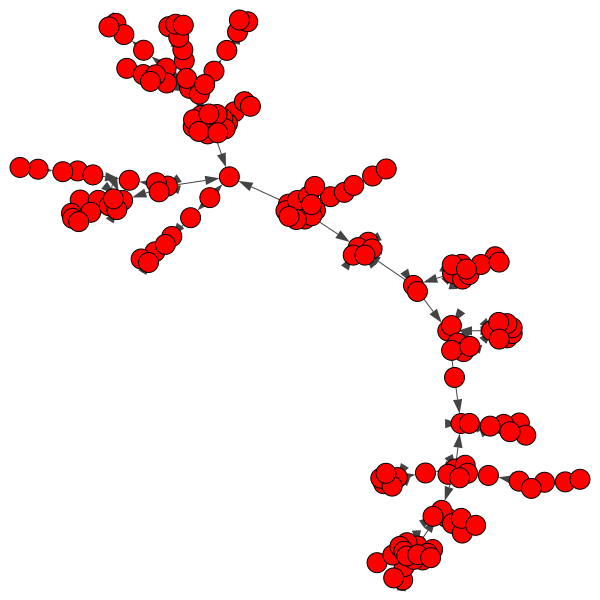

In [58]:
g_com5 = ig.Graph.TupleList(df_fake_com5.itertuples(index=False), directed=True)
ig.plot(g_com5)

In [59]:
#com5_nodes_df.to_csv('le_com5_nodes.csv', index = False)
#df_fake_com5.to_csv('le_com5_edges.csv', index = False)